# Breast Cancer Classification

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are: 

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise data and determine the best pre-processing;
- to create the necessary datasets for training and testing purposes;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code runs correctly on the original data file.

Some of the parts of this assignment build on the workflow from the first assignment and that part of the course, and so less detailed instructions are provided for this, as you should be able to implement this workflow now without low-level guidance. A substantial portion of the marks for this assignment are associated with making the right choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and certain restrictions on sklearn functions will be made clear in the instruction text. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. This makes their method much faster than existing ones, but it is also slightly noisier. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 1) have at least a 95% probability of detecting malignant cancer when it is present;
 2) have no more than 1 in 10 healthy cases (those with benign tumours) labelled as positive (malignant).
 
They have hand-labelled 300 samples for you, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail, as appropriate to the marks given.

## 1. Investigate Dataset

In [480]:
# This code imports some libraries that you will need. 
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

### 1.1 Load the dataset
Do this from the csv file, `assignment2.csv`, as done in assignment 1 and workshops 2 and 3. Extract the feature names and label names for use later on.  Note that we will be treating the _malignant_ case as our _positive_ case, as this is the standard convention in medicine.

**Print out some information (in text) about the data, to verify that the loading has worked and to get a feeling for what is present in the dataset and the range of the values.**

**Also, graphically show the proportions of the labels in the whole dataset.**

In [481]:
# Your code here
cancer_df = pd.read_csv("assignment2.csv")
cancer_df.head()

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,15.494654,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,19.522957,22.427276,135.128520,1286.903131,0.142725,0.407483,0.445992,0.171662,0.353211,0.097731
1,malignant,16.229871,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,19.140235,24.905156,123.886045,1234.499997,0.129135,0.223918,0.248846,0.136735,0.284427,0.085758
2,malignant,16.345671,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,19.144816,25.601433,125.113036,1202.749973,0.135017,0.314402,0.332505,0.161497,0.313038,0.084340
3,malignant,13.001009,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,15.565911,26.145119,102.958265,737.655082,0.161390,0.485912,0.430007,0.167254,0.432297,0.117705
4,malignant,16.416060,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,18.620376,22.306233,124.002529,1139.490971,0.133950,0.230996,0.316620,0.131715,0.269591,0.080497


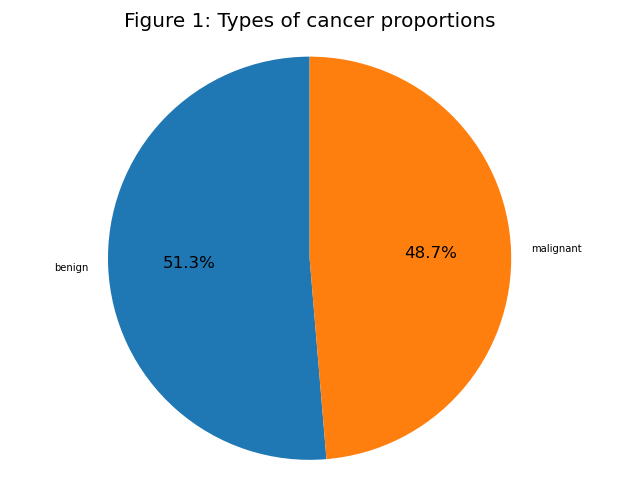

In [482]:
prop = cancer_df[['label','mean radius']].groupby('label').count() # Calculating proportion of each label

# Plotting the proportions
plt.rcParams['figure.dpi'] = 120
plt.pie(prop['mean radius'], labels=prop.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Figure 1: Types of cancer proportions')

# Display the chart
plt.show()

In [483]:
# Displaying the datatype and the features of the dataset

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    300 non-null    object 
 1   mean radius              300 non-null    float64
 2   mean texture             300 non-null    float64
 3   mean perimeter           300 non-null    float64
 4   mean area                300 non-null    float64
 5   mean smoothness          300 non-null    float64
 6   mean compactness         300 non-null    float64
 7   mean concavity           300 non-null    float64
 8   mean concave points      300 non-null    float64
 9   mean symmetry            300 non-null    float64
 10  mean fractal dimension   300 non-null    float64
 11  radius error             300 non-null    float64
 12  texture error            300 non-null    float64
 13  perimeter error          300 non-null    float64
 14  area error               3

In [484]:
# Summary of the dataset

cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,14.231808,19.312619,92.727687,664.367372,0.096937,0.106615,0.092591,0.050820,0.182546,0.062841,...,16.460566,25.772128,108.563914,900.644633,0.133424,0.261732,0.282075,0.118146,0.293620,0.084556
std,1.297393,1.572224,8.949937,129.515717,0.005067,0.020819,0.030312,0.014350,0.010754,0.002736,...,1.798202,2.346310,12.500033,209.738842,0.008678,0.063535,0.079831,0.024552,0.025620,0.007427
min,11.560025,15.349270,74.690886,477.371592,0.084651,0.075184,0.050771,0.028701,0.157059,0.057830,...,13.279265,20.144214,87.110184,633.771881,0.110342,0.167098,0.152272,0.066927,0.240341,0.072745
25%,13.356676,18.194791,86.659535,580.383274,0.093305,0.091105,0.069071,0.039507,0.175353,0.060950,...,15.148044,24.058893,99.229249,752.124790,0.127682,0.215767,0.219671,0.098389,0.277676,0.079636
50%,13.976933,19.220652,90.896982,628.004851,0.096722,0.102401,0.084829,0.046744,0.181685,0.062477,...,16.007171,25.689861,105.540619,828.667704,0.133064,0.247022,0.267894,0.115679,0.288994,0.082610
75%,15.103078,20.245660,99.093762,737.444716,0.099995,0.117334,0.107994,0.060606,0.187789,0.064149,...,17.656889,27.333610,116.274995,1011.628413,0.138650,0.298732,0.325278,0.136687,0.305227,0.087645
max,19.090091,26.836291,126.168030,1300.788708,0.114500,0.192880,0.212704,0.105212,0.226448,0.076091,...,22.676185,34.614459,150.353232,1796.820974,0.164583,0.543118,0.635074,0.179794,0.432297,0.128288


In [485]:
# Checking is there are any null values

cancer_df.isnull().sum()

label                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [486]:
# Getting all features names separately

features_names = list(cancer_df.drop("label", axis=1).columns)
mean_features = [i for i in features_names if 'mean' in i]
error_features = [i for i in features_names if 'error' in i]
worst_features = [i for i in features_names if 'worst' in i]
label_name = ["label"]
print("List of feature names:", mean_features, error_features, worst_features, sep='\n')
print("List of label names:", label_name)

List of feature names:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']
['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']
['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
List of label names: ['label']


### 1.2 Visualise the dataset

As this data is well curated by the client already, you do not need to worry about outliers, missing values or imputation in this case, but be aware that this is the exception, not the rule.

To familiarise yourself with the nature and information contained in the data, display histograms for the data according to the following instructions:
 - **display histograms** for each feature in the _mean_ group, but on _each_ histogram **have the two classes displayed together in one plot** (see example plot below and a code fragment to help you) - and note that your plot does not need to look exactly the example here;
 - **repeat this** for the _standard error_ and _worst_ groups;
 - make sure that in all cases you clearly label the plots and the classes in histograms.

<center><img src="Example_Hist_Plot.png" width="300" alt="Example plot of histogram"></center>

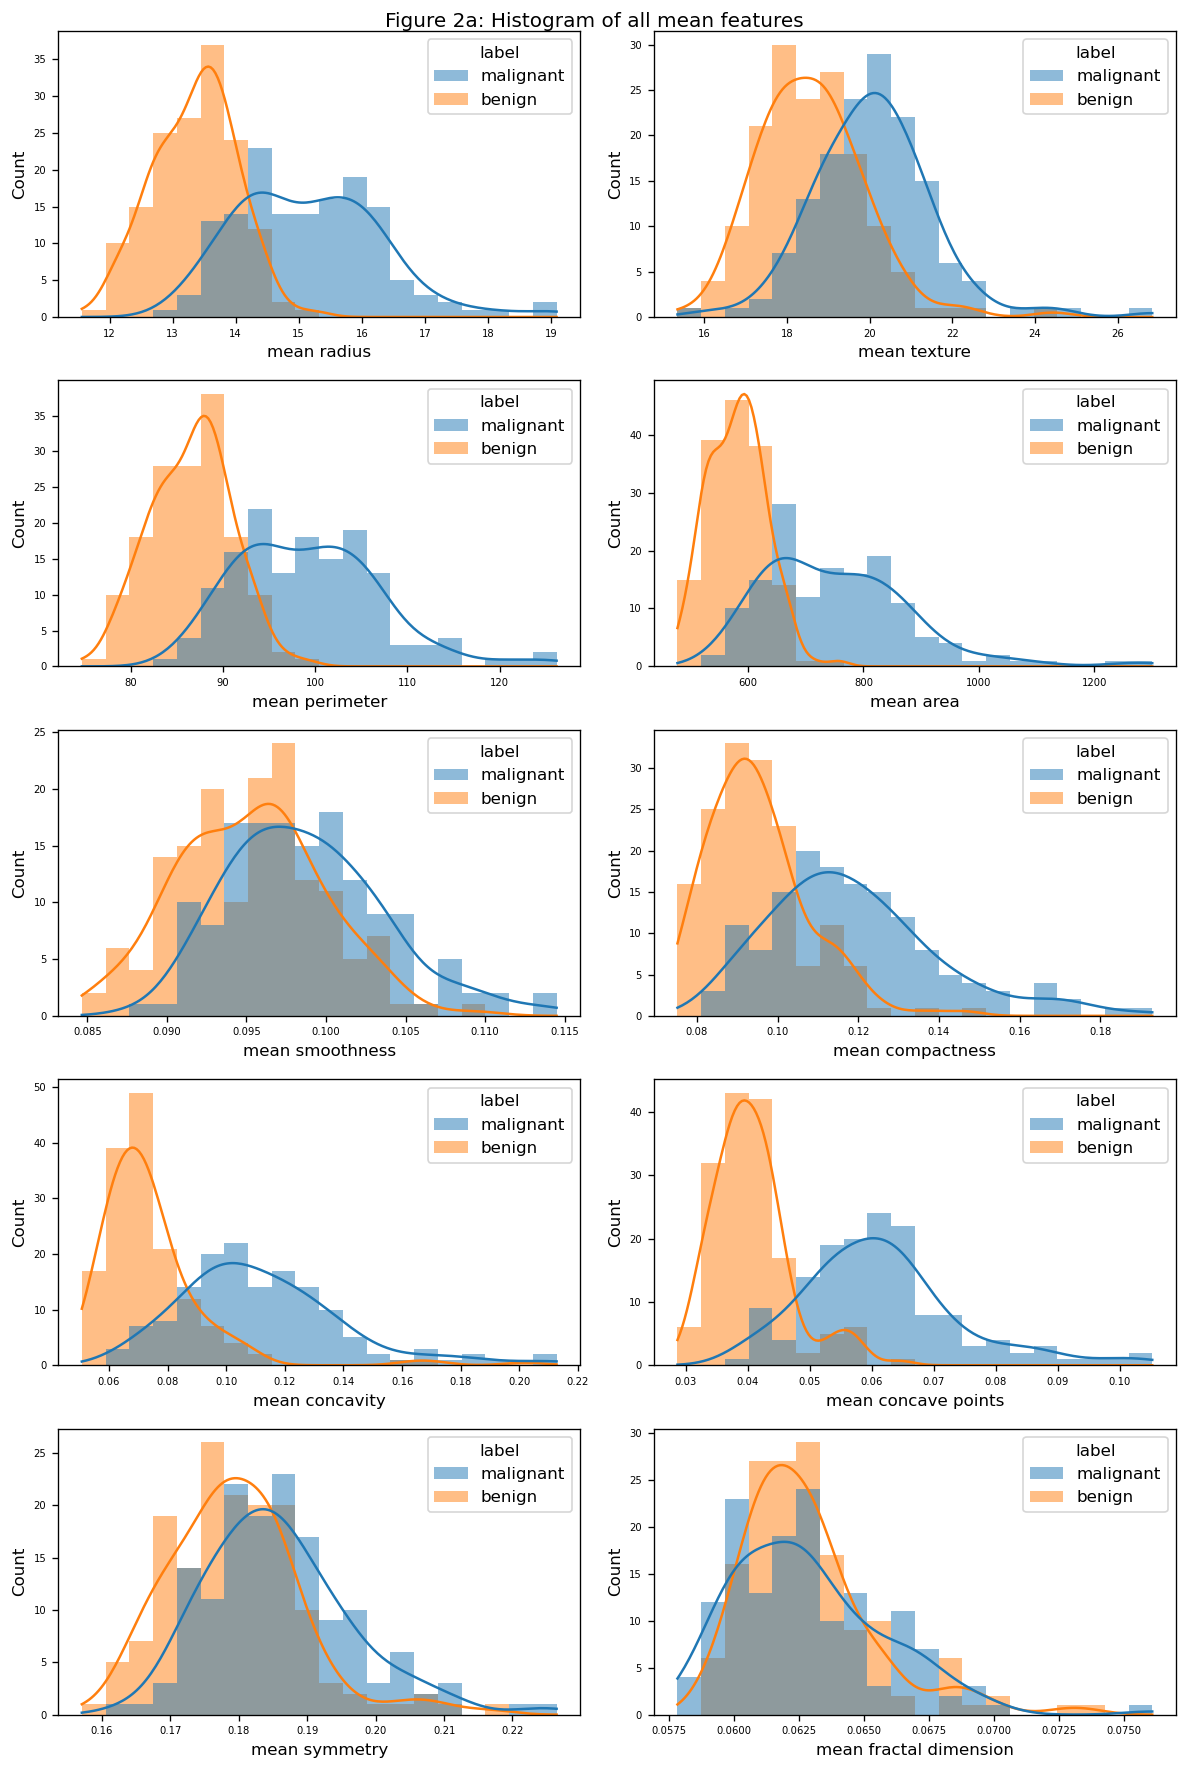

In [487]:
# Code fragment to help with plotting histograms combining matplotlib and seaborn (and pandas)

Nplots = len(mean_features) # Number of plots required
Ncols = 2  # Number of columns per row
Nrows = (Nplots + Ncols - 1) // Ncols  # Calculate the number of rows needed(just for asthetic purpose)

fig, axes = plt.subplots(Nrows, Ncols, figsize=(10, 15))

counter = 0
for row in range(Nrows):
    for col in range(Ncols):
        sns.histplot(data=cancer_df, x=mean_features[counter], hue='label', bins=20, kde=True, ax=axes[row,col], edgecolor=None)
        counter += 1

plt.suptitle('Figure 2a: Histogram of all mean features')
plt.tight_layout()
plt.show()

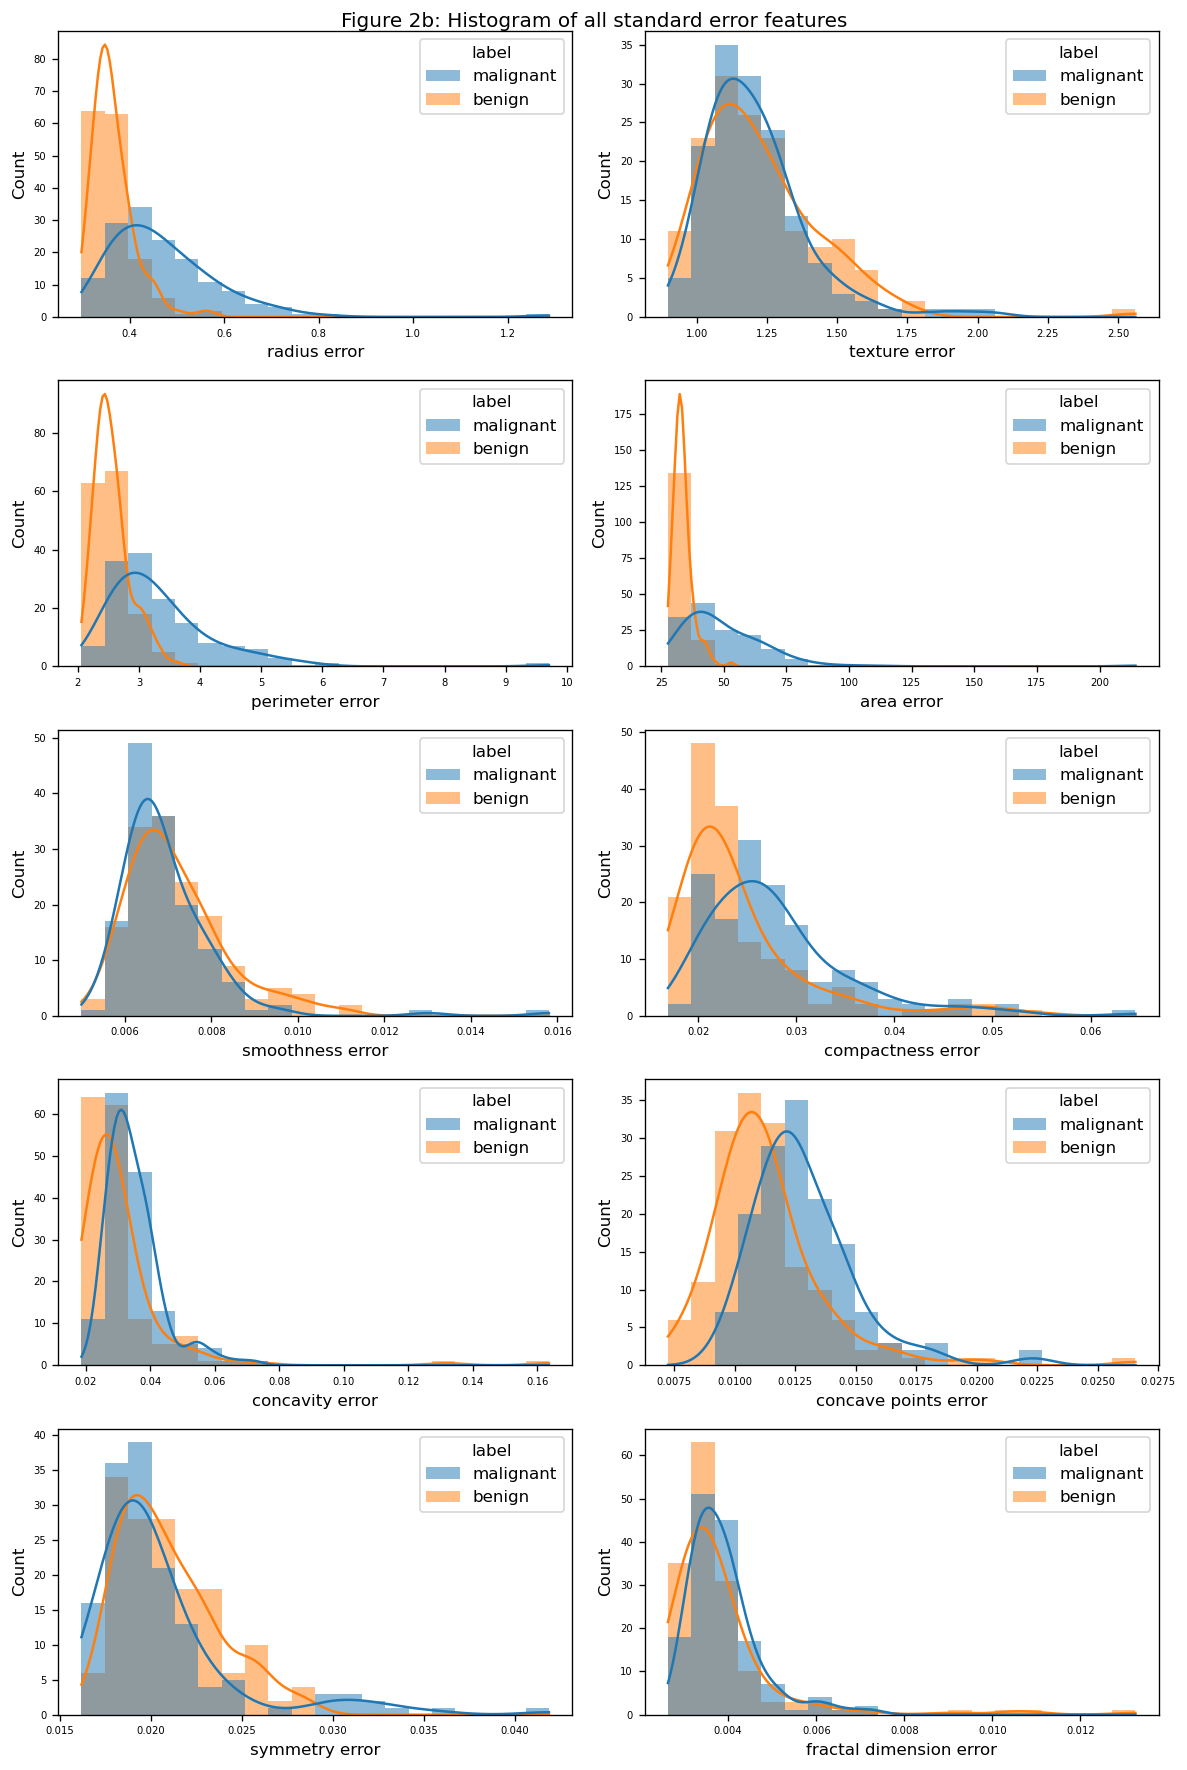

In [488]:
# Your code here

Nplots = len(error_features) # Number of plots required
Ncols = 2  # Number of columns per row
Nrows = (Nplots + Ncols - 1) // Ncols  # Calculate the number of rows needed(just for asthetic purpose)

fig, axes = plt.subplots(Nrows, Ncols, figsize=(10, 15))

counter = 0
for row in range(Nrows):
    for col in range(Ncols):
        sns.histplot(data=cancer_df, x=error_features[counter], hue='label', bins=20, kde=True, ax=axes[row,col], edgecolor=None)
        counter += 1

plt.suptitle('Figure 2b: Histogram of all standard error features')
plt.tight_layout()
plt.show()

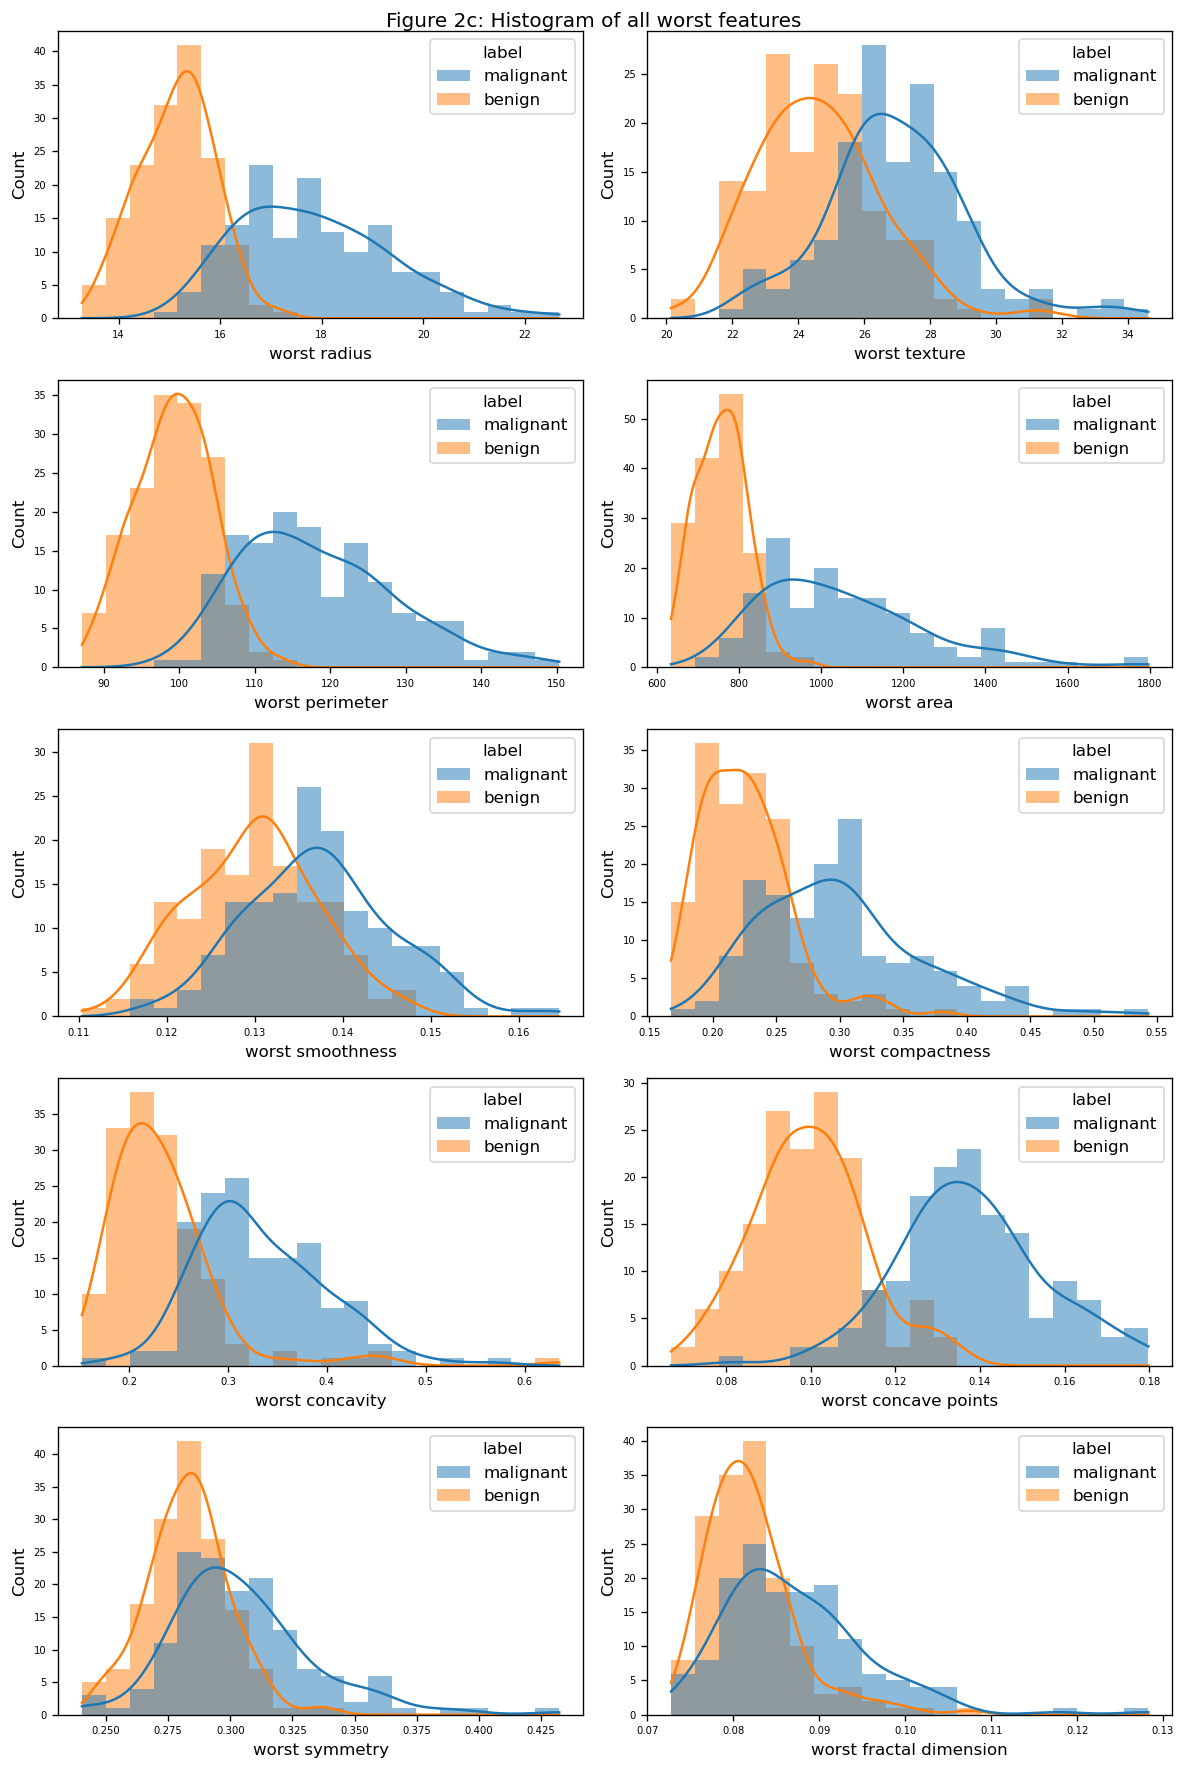

In [489]:
Nplots = len(worst_features) # Number of plots required
Ncols = 2  # Number of columns per row
Nrows = (Nplots + Ncols - 1) // Ncols  # Calculate the number of rows needed(just for asthetic purpose)

fig, axes = plt.subplots(Nrows, Ncols, figsize=(10, 15))

counter = 0
for row in range(Nrows):
    for col in range(Ncols):
        sns.histplot(data=cancer_df, x=worst_features[counter], hue='label', bins=20, kde=True, ax=axes[row,col], edgecolor=None)
        counter += 1

plt.suptitle('Figure 2c: Histogram of all worst features')
plt.tight_layout()
plt.show()

### 1.3 Ranking the features

**Based on the histograms, which do you think are the 3 strongest features for discriminating between the classes?**

### Answer:
From the Figures 2a, 2b and 2c, we can see that `worst concave points`, `worst radius` and `worst perimeter` features are the **3 strongest features for discriminating between the classes** since they have a bimodal distribution and the least overlap of data. All the Error features have majority of data overlapping which makes it difficult to discriminate, and in Mean features most of features are either unimodal distributed or have a majority of data overlapping.

### 1.4 Splitting the dataset

Split the dataset into appropriate subsets. You must choose what the subsets are and how big they are. However, we want to make sure the proportion of the two classes is consistent across all datasets, so use the _stratify_ option, as used in workshops 5 and 6. Verify the size and label distribution in each dataset.

In [490]:
# Your code here
from sklearn.model_selection import train_test_split

cancer_df['label'] = cancer_df['label'].map({'malignant': 1, 'benign': 0})

X = cancer_df.drop('label', axis=1)
y = cancer_df['label']

Xtrain, X_test, ytrain, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=0.25, random_state=42, stratify=ytrain)

print("Train dataset:", X_train.shape, y_train.shape) #60%
print("Validation dataset:", X_val.shape, y_val.shape) #20%
print("Test dataset:", X_test.shape, y_test.shape) #20%

Train dataset: (180, 30) (180,)
Validation dataset: (60, 30) (60,)
Test dataset: (60, 30) (60,)


## 2. Build, Train and Optimise Classifiers

### 2.1 Pipeline
**Build a pre-processing pipeline** that includes imputation (as even though we don't strictly need it here it is a good habit to always include it) and other appropriate pre-processing.  

In [491]:
# Your code here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

preproc_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

### 2.2 Baseline measurements

For our classification task we will consider **three simple baseline cases**:
1) predicting all samples to be negative (class 1)
2) predicting all samples to be positive (class 2)
3) making a random prediction for each sample with equal probability for each class

**For each case measure and display the following metrics:**
 - balanced accuracy
 - recall
 - precision
 - auc
 - f1score
 - fbeta_score with beta=0.1
 - fbeta_score with beta=10

Also **calculate and display the confusion matrix** for each baseline case, using a heatmap and numbers.

In [492]:
from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

In [493]:
# Your code here

from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, roc_curve, auc, f1_score

print("Case 1: Predicting all samples to be negative")
negative_data = [0] * 180
negative_cases = pd.Series(negative_data)

bal_acc = balanced_accuracy_score(y_true = y_train, y_pred = negative_cases)
recl = recall_score(y_true = y_train, y_pred = negative_cases)
prec = precision_score(y_true = y_train, y_pred = negative_cases)
fpr, tpr, thresholds = roc_curve(y_train, negative_cases)
auc1 = auc(fpr, tpr)
f1score = f1_score(y_true = y_train, y_pred = negative_cases)
fbeta_score_01 = f01_score(y_train, negative_cases)
fbeta_score_10 = f10_score(y_train, negative_cases)
print("Balanced Accuracy =", bal_acc, "Recall =", recl, "Precision =", prec, "AUC =", auc1, "F1Score =", f1score, "Fbeta_Score(0.1) =", fbeta_score_01, "Fbeta_Score(10) =", fbeta_score_10)

print("Case 2: Predicting all samples to be positive")
positive_data = [1] * 180
positive_cases = pd.Series(positive_data)

bal_acc = round(balanced_accuracy_score(y_true = y_train, y_pred = positive_cases),2)
recl = round(recall_score(y_true = y_train, y_pred = positive_cases),2)
prec = round(precision_score(y_true = y_train, y_pred = positive_cases),2)
fpr, tpr, thresholds = roc_curve(y_train, positive_cases)
auc1 = round(auc(fpr, tpr),2)
f1score = round(f1_score(y_true = y_train, y_pred = positive_cases),2)
fbeta_score_01 = round(f01_score(y_train, positive_cases),2)
fbeta_score_10 = round(f10_score(y_train, positive_cases),2)
print("Balanced Accuracy =", bal_acc, "Recall =", recl, "Precision =", prec, "AUC =", auc1, "F1Score =", f1score, "Fbeta_Score(0.1) =", fbeta_score_01, "Fbeta_Score(10) =", fbeta_score_10)

print("Case 3: Equal probability for each class")
pos_neg_data = np.random.choice(a=[0, 1], size=180, p=[0.5, 0.5])
pos_neg_cases = pd.Series(pos_neg_data)

bal_acc = round(balanced_accuracy_score(y_true = y_train, y_pred = pos_neg_cases),2)
recl = round(recall_score(y_true = y_train, y_pred = pos_neg_cases),2)
prec = round(precision_score(y_true = y_train, y_pred = pos_neg_cases),2)
fpr, tpr, thresholds = roc_curve(y_train, pos_neg_cases)
auc1 = round(auc(fpr, tpr),2)
f1score = round(f1_score(y_true = y_train, y_pred = pos_neg_cases),2)
fbeta_score_01 = round(f01_score(y_train, pos_neg_cases),2)
fbeta_score_10 = round(f10_score(y_train, pos_neg_cases),2)
print("Balanced Accuracy =", bal_acc, "Recall =", recl, "Precision =", prec, "AUC =", auc1, "F1Score =", f1score, "Fbeta_Score(0.1) =", fbeta_score_01, "Fbeta_Score(10) =", fbeta_score_10)

Case 1: Predicting all samples to be negative
Balanced Accuracy = 0.5 Recall = 0.0 Precision = 0.0 AUC = 0.5 F1Score = 0.0 Fbeta_Score(0.1) = 0.0 Fbeta_Score(10) = 0.0
Case 2: Predicting all samples to be positive
Balanced Accuracy = 0.5 Recall = 1.0 Precision = 0.49 AUC = 0.5 F1Score = 0.66 Fbeta_Score(0.1) = 0.49 Fbeta_Score(10) = 0.99
Case 3: Equal probability for each class
Balanced Accuracy = 0.52 Recall = 0.56 Precision = 0.51 AUC = 0.52 F1Score = 0.53 Fbeta_Score(0.1) = 0.51 Fbeta_Score(10) = 0.56


C:\Users\rohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


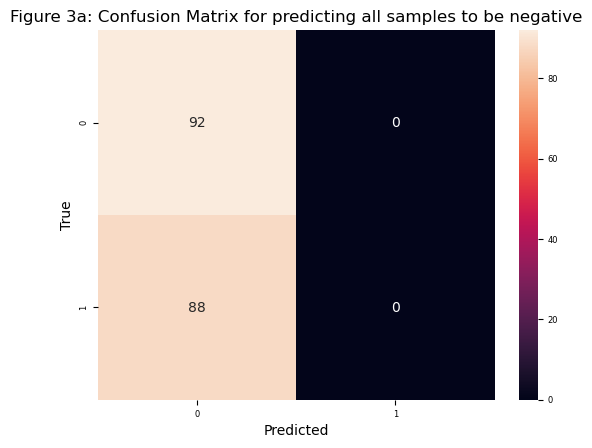

In [494]:
import seaborn as sn

# Setting the size of the plot
plt.rcParams['figure.dpi'] = 100
cmat = confusion_matrix(y_true=y_train, y_pred=negative_cases) # Generate the confusion matrix
sn.heatmap(cmat, annot=True) # Generate the heatmap using the confusion matrix

# Labelling the axes
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 3a: Confusion Matrix for predicting all samples to be negative')
plt.show()

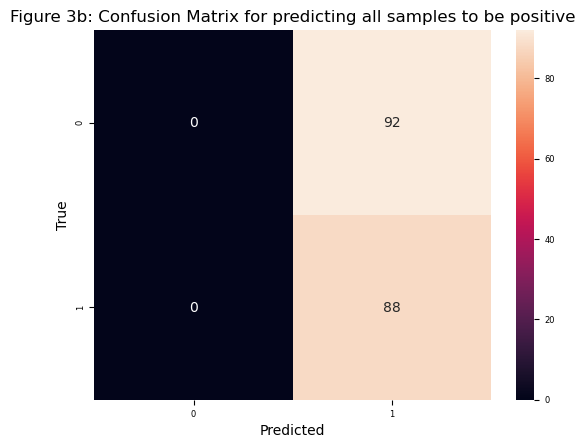

In [495]:
cmat = confusion_matrix(y_true=y_train, y_pred=positive_cases)
sn.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 3b: Confusion Matrix for predicting all samples to be positive')
plt.show()

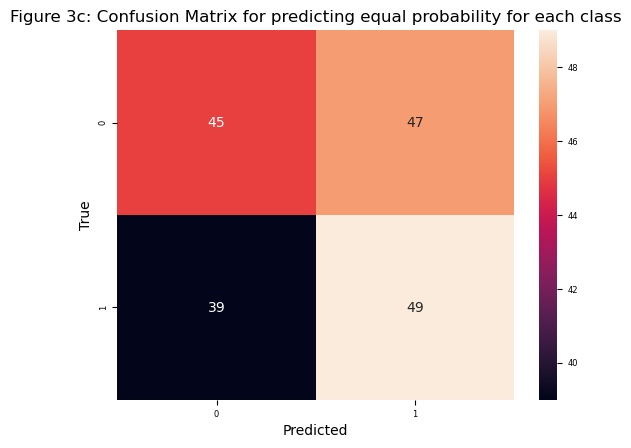

In [496]:
cmat = confusion_matrix(y_true=y_train, y_pred=pos_neg_cases)
sn.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 3c: Confusion Matrix for predicting equal probability for each class')
plt.show()

## Choose a performance metric to use for evaluating your machine learning methods:

The performance metric for evaluating/driving this machine learning method based on the client's requirements is `Recall`, since it measures the ability of a model to correctly identify all positive samples (in this case, malignant cancer) out of all the actual positive samples present in the dataset. A high recall indicates a low rate of false negatives, which aligns with the first client's requirement of detecting malignant cancer when it is present.

`Precision` addresses the client's 2nd requirement of not misclassifying healthy cases(benign) as positive (malignant). Precision measures the proportion of true positive predictions out of all positive predictions made by the model.

But `Recall` is considered more important than `Precision` because missing the detection of a malignant tumor can have more severe consequences than misclassifying the tumor.

### 2.4 SGD baseline

For a stronger baseline, **train and evaluate** the Stochastic Gradient Descent classifier (as seen in workshop 5). For this baseline case use the default settings for all the hyperparameters.

In [497]:
# Your code here
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Preprocessing the train and validation dataset
proc_X_train = preproc_pipeline.fit_transform(X_train)
proc_X_val = preproc_pipeline.fit_transform(X_val)

# Fitting the SGD classifier
sgd = SGDClassifier()
sgd.fit(proc_X_train, y_train)

# Predicting the train and validation values
pred_y_train = sgd.predict(proc_X_train)
pred_y_val = sgd.predict(proc_X_val)

# Performance evaluation
train_sgd_recall = round(recall_score(y_true = y_train, y_pred = pred_y_train),3)
val_sgd_recall = round(recall_score(y_true = y_val, y_pred = pred_y_val),3)

print(f'Training dataset Recall score: {train_sgd_recall}')
print(f'Validation dataset Recall score: {val_sgd_recall}')

Training dataset Recall score: 0.966
Validation dataset Recall score: 0.897


### 2.5 Confusion matrix

Calculate and display the normalized version of the confusion matrix.  From this **calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.**

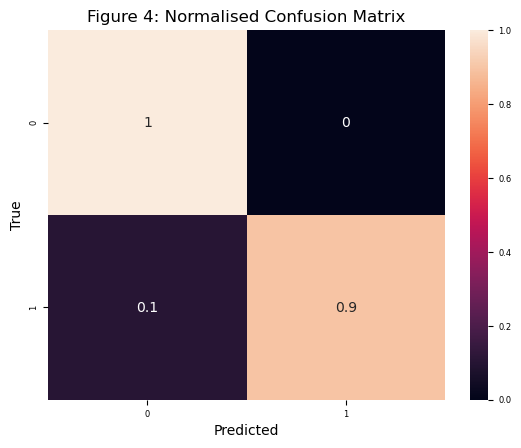

In [498]:
# Your code here
cmat = confusion_matrix(y_true=y_val, y_pred=pred_y_val, normalize='true')
sn.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 4: Normalised Confusion Matrix')
plt.show()

## Which of the client's two criteria does this relate to, and is this baseline satisfying this criterion or not?

Probability that a sample from a person with a malignant tumour is given a result that they do not have cancer is `0.034`. This means `3.4%` of the malignant cancers are identified as benign, which implies `96.6%` of the malignant cancers are identified correctly. Hence, this relates to the client's 1st requirement, i.e, `have at least a 95% probability of detecting malignant cancer when it is present`. `Yes, this baseline satisfies the criteria`, since the calculated percentage is greater than the minimum required.

### 2.6 Main classifier

**Train and optimise the hyperparameters** to give the best performance for **each of the following classifiers**:
 - KNN (K-Nearest Neighbour) classifier
 - Decision tree classifier
 - Support vector machine classifier
 - SGD classifier
 
Follow best practice as much as possible here. You must make all the choices and decisions yourself, and strike a balance between computation time and performance.

You can use any of the sci-kit learn functions in sklearn.model_selection.cross* and anything used in workshops 3, 4, 5 and 6. Other hyper-parameter optimisation functions apart from these cannot be used (even if they are good and can be part of best practice in other situations - for this assignment everyone should assume they only have very limited computation resources and limit themselves to these functions).

**Display the performance of the different classifiers and the optimised hyperparameters.**

In [499]:
# Your code here

import time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

print("KNN")
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],     # Number of neighbors to consider
    'weights': ['uniform', 'distance']   # Weight function used in prediction
    #'p': [1, 2, 3],                     # Power parameter for the Minkowski distance metric
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object and fit it to the data
knn_grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
start_time = time.time()
knn_grid_search.fit(proc_X_train, y_train)
end_time = time.time()

# Print the best hyperparameters, corresponding ROC AUC and computation time
print("Computation time (in secs):", round(end_time-start_time,3))
print("Best Hyperparameters:", knn_grid_search.best_params_)
print("Best Recall score:", round(knn_grid_search.best_score_,3))

# Get the best model
best_knn = knn_grid_search.best_estimator_

# Evaluate the best model on the validation set
val_auc = best_knn.score(proc_X_val, y_val)
print("Validation Recall score:", round(val_auc,3))

KNN
Computation time (in secs): 0.333
Best Hyperparameters: {'n_neighbors': 9, 'weights': 'uniform'}
Best Recall score: 0.943
Validation Recall score: 0.95


In [500]:
from sklearn.tree import DecisionTreeClassifier

print("Decision Tree")
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Function to measure the quality of a split
    'max_depth': [None, 5, 10, 15],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],               # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                 # Minimum number of samples required to be at a leaf node
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Create a GridSearchCV object and fit it to the data
dt_grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='recall')
start_time = time.time()
dt_grid_search.fit(proc_X_train, y_train)
end_time = time.time()

# Print the best hyperparameters and corresponding accuracy score
print("Computation time:", round(end_time-start_time,3))
print("Best Hyperparameters:", dt_grid_search.best_params_)
print("Best Recall score:", round(dt_grid_search.best_score_,3))

# Get the best model
best_dt = dt_grid_search.best_estimator_

# Evaluate the best model on the validation set
val_auc = best_dt.score(proc_X_val, y_val)
print("Validation Recall score:", round(val_auc,3))

Decision Tree
Computation time: 1.212
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Recall score: 0.932
Validation Recall score: 0.85


In [501]:
from sklearn.svm import SVC

print("SVM")
# Define the parameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10],        # Regularization parameter
    'kernel': ['linear', 'rbf']     # Kernel function used for mapping data into a higher-dimensional space
    #'gamma': ['scale', 'auto'],
}

# Create a Support Vector Machine classifier
svm_classifier = SVC()

# Create a GridSearchCV object and fit it to the data
svm_grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='recall')
start_time = time.time()
svm_grid_search.fit(proc_X_train, y_train)
end_time = time.time()

# Print the best hyperparameters and corresponding accuracy score
print("Computation time:", round(end_time-start_time,3))
print("Best Hyperparameters:", svm_grid_search.best_params_)
print("Best Recall score:", round(svm_grid_search.best_score_,3))

# Get the best model
best_svm = svm_grid_search.best_estimator_

# Evaluate the best model on the validation set
val_auc = best_svm.score(proc_X_val, y_val)
print("Validation Recall score:", round(val_auc,3))

SVM
Computation time: 0.093
Best Hyperparameters: {'C': 1, 'kernel': 'rbf'}
Best Recall score: 0.954
Validation Recall score: 0.983


In [510]:
print("SGD")

# Define the parameter grid to search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],                # Regularization parameter
    'loss': ['hinge', 'log_loss'],                      # Loss function to optimize
    'penalty': [None, 'l1', 'l2'],                      # Regularization term
    'learning_rate': ['constant', 'optimal'],           # Hyperparameter that controls how much to change the model
    'eta0': [0.00001, 0.0001, 0.001, 0.01]              # Initial learning rate
    #'early_stopping': [False, True],
    #'validation_fraction': [0.0001, 0.001, 0.01, 0.1]
}

# Create an SGD classifier
sgd_classifier = SGDClassifier()

# Create a GridSearchCV object and fit it to the data
sgd_grid_search = GridSearchCV(sgd_classifier, param_grid, cv=5, scoring='recall')
start_time = time.time()
sgd_grid_search.fit(proc_X_train, y_train)
end_time = time.time()

# Print the best hyperparameters and corresponding accuracy score
print("Computation time:", round(end_time-start_time,3))
print("Best Hyperparameters:", sgd_grid_search.best_params_)
print("Best Recall score:", round(sgd_grid_search.best_score_,3))

# Get the best model
best_sgd = sgd_grid_search.best_estimator_

# Evaluate the best model on the validation set
val_auc = best_sgd.score(proc_X_val, y_val)
print("Validation Recall score:", round(val_auc,3))

SGD
Computation time: 2.126
Best Hyperparameters: {'alpha': 0.1, 'eta0': 1e-05, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}
Best Recall score: 0.955
Validation Recall score: 0.967


### Based on these results, list the best 3 classifiers and indicate if you think any perform equivalently.

The 3 best classifiers are:
1. Support Vector Machine classifier
2. SGD classifier
3. KNN (K-Nearest Neighbour) classifier

**SVM** has `Recall score=0.98` on validation dataset and `computation time=0.093 secs`. While **SGD** has `Recall score=0.967` and `computation time=2.137 secs`. Whereas, **KNN** has `Recall score=0.95` and `computation time=0.333 secs`.

### 2.7 Model selection

**Choose the best classifier** (as seen in workshops 3 to 6) and give details of your hyperparameter settings. **Explain the reason for your choice.**

# Your answer here

Out of the 3 best classifiers chosen above, SVM classifier is the best since it has the highest Recall score and least computation time among the rest. The best hyperparameters for this SVM model are:
* alpha=0.1
* eta0=0.0001
* learning_rate='optimal'
* loss='hinge'
* penalty='l1'

### 2.8 Final performance

**Calculate and display an unbiased performance measure that you can present to the client.**

In [503]:
# Your code here

# Preprocessing the test dataset
proc_X_test = preproc_pipeline.fit_transform(X_test)

# Setting the best hyperparameter values to the model and training the model with new dataset
svm_classifier.set_params(**svm_grid_search.best_params_)
svm_classifier.fit(proc_X_train, y_train)

#Predicting train, validation and test values
pred_y_train = svm_classifier.predict(proc_X_train)
pred_y_val = svm_classifier.predict(proc_X_val)
pred_y_test = svm_classifier.predict(proc_X_test)

# Unbiased performance evaluation
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, pred_y_train)
svm_train_auc = round(auc(train_fpr, train_tpr),3)

val_fpr, val_tpr, val_thresholds = roc_curve(y_val, pred_y_val)
svm_val_auc = round(auc(val_fpr, val_tpr),3)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, pred_y_test)
svm_test_auc = round(auc(test_fpr, test_tpr),3)

print("Train SVM ROC_AUC:", svm_train_auc)
print("Validate SVM ROC_AUC:", svm_val_auc)
print("Test SVM ROC_AUC:", svm_test_auc)

Train SVM ROC_AUC: 0.983
Validate SVM ROC_AUC: 0.983
Test SVM ROC_AUC: 0.967


## Is your chosen classifier underfitting or overfitting? Does your chosen classifier meet the client's performance criteria?

ROC_AUC is an unbiased performance measure, since it measures the model's ability to distinguish between the positive and negative classes across various threshold settings. The AUC-ROC is insensitive to class distribution and provides a fair assessment of the model's performance.

Since the roc_auc is not dropping sharply for the validation/test dataset for it to be overfitting and since the roc_auc is greater than 0.5 for it to be unerfitting, the `classifier is neither underfitting nor overfitting`.

## 3. Decision Boundaries

### 3.1 Rank features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is (mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1))), where x1 and x2 are the datasets corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [504]:
# Your code here

# Separate data into each class
malignant_data = cancer_df[cancer_df['label'] == 1]
benign_data = cancer_df[cancer_df['label'] == 0]
    
# Calculate means and variances for each feature in both classes
malignant_means = malignant_data.drop('label', axis=1).mean()
benign_means = benign_data.drop('label', axis=1).mean()
malignant_variances = malignant_data.drop('label', axis=1).var()
benign_variances = benign_data.drop('label', axis=1).var()
        
# Calculate the T-score for each feature
t_scores = (malignant_means - benign_means) / (0.5 * (np.sqrt(malignant_variances) + np.sqrt(benign_variances)))
print("Best 4 features according to T-scores:", t_scores.sort_values(ascending=False)[:4], sep='\n')

Best 4 features according to T-scores:
worst concave points    2.487161
worst perimeter         2.473073
worst radius            2.410839
mean concave points     2.229436
dtype: float64


### 3.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the DecisionBoundaryDisplay function (as per workshop 6).

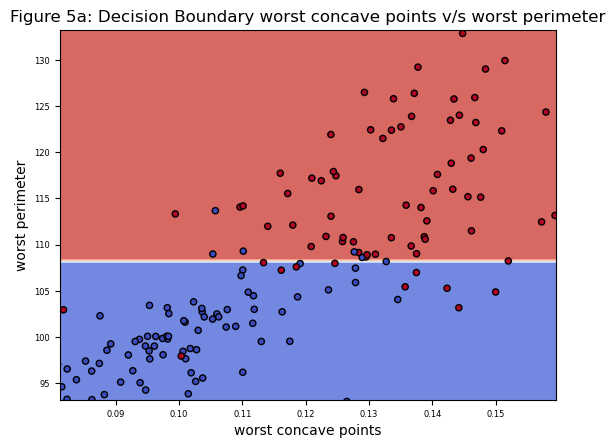

In [505]:
from sklearn.inspection import DecisionBoundaryDisplay

# For each one, extract the percentil 5 and 95. These values are useful to define the limits of our plot
x05, x95 = np.percentile(X_train['worst concave points'],[5,95])
y05, y95 = np.percentile(X_train['worst perimeter'],[5,95])

# Define two features. We go to use the best two features identified in the previous step
feat1, feat2 = X_train['worst concave points'], X_train['worst perimeter']

# Train again our model using only the two features 
svm_classifier.fit(X_train[['worst concave points', 'worst perimeter']],y_train)

# We can plot a DecisionBoundary
disp = DecisionBoundaryDisplay.from_estimator(
    svm_classifier,                                             # Define the model
    X_train[['worst concave points', 'worst perimeter']],       # Define the data
    response_method="predict",                                  # Define the method used to create the boundary
    cmap=plt.cm.coolwarm,                                       # Color palette
    alpha=0.8,                                                  # Transparency
    xlabel= "worst concave points",                             # Label 1
    ylabel= "worst perimeter")                                  # Label 2

# We can plot the data with its true classes
plt.scatter(feat1, feat2, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

# Define the limit values of the plot
plt.xlim([x05,x95])
plt.ylim([y05,y95])
plt.title("Figure 5a: Decision Boundary worst concave points v/s worst perimeter")
plt.show()

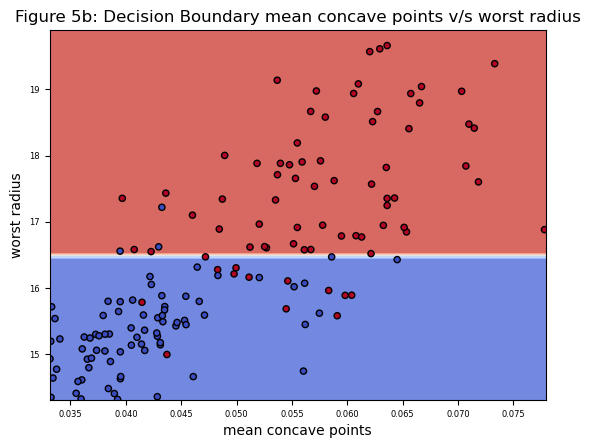

In [506]:
# Your code here

# For each one, extract the percentil 5 and 95. These values are useful to define the limits of our plot
x05, x95 = np.percentile(X_train['mean concave points'],[5,95])
y05, y95 = np.percentile(X_train['worst radius'],[5,95])

# Define two features. We go to use the best two features identified in the previous step
feat1, feat2 = X_train['mean concave points'], X_train['worst radius']

# Train again our model using only the two features 
svm_classifier.fit(X_train[['mean concave points', 'worst radius']],y_train)

# We can plot a DecisionBoundary
disp = DecisionBoundaryDisplay.from_estimator(
    svm_classifier,                                             # Define the model
    X_train[['mean concave points', 'worst radius']],       # Define the data
    response_method="predict",                                  # Define the method used to create the boundary
    cmap=plt.cm.coolwarm,                                       # Color palette
    alpha=0.8,                                                  # Transparency
    xlabel= "mean concave points",                             # Label 1
    ylabel= "worst radius")                                  # Label 2

# We can plot the data with its true classes
plt.scatter(feat1, feat2, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

# Define the limit values of the plot
plt.xlim([x05,x95])
plt.ylim([y05,y95])
plt.title("Figure 5b: Decision Boundary mean concave points v/s worst radius")
plt.show()

### 3.3 Interpretation

From the decision boundaries displayed above, **would you expect the method to extrapolate well or not**?  Give reasons for your answer.

#### Answer:
Yes, the method extrapolates well, since the Decision Boundaries displayed above are Simple. These are typically smooth and not overly complex. They do not try to fit the noise in the training data and, instead, capture the underlying patterns of the data. Models with simple decision boundaries tend to have good generalization and can extend well to new, unseen data points.

## 4. Second Round

After presenting your initial results to the client they come back to you and say that they have done some financial analysis and it would save them a lot of time and money if they did not have to analyse every cell, which is needed to get the "worst" features. Instead, they can quickly get accurate estimates for the "mean" and "standard error" features from a much smaller, randomly selected set of cells.

They ask you to **give them a performance estimate for the same problem, but without using any of the "worst" features.**



### 4.1 New estimate

**Calculate an unbiased performance estimate** for this new problem, as requested by the client.

In [507]:
# Your code here

# Dropping all worst features from the train, validate and test dataset
filtered_X_train = X_train.drop(columns=X_train.filter(like='worst').columns)
filtered_X_val = X_val.drop(columns=X_val.filter(like='worst').columns)
filtered_X_test = X_test.drop(columns=X_test.filter(like='worst').columns)

# Transforming the filtered datasets
proc_filtered_X_train = preproc_pipeline.fit_transform(filtered_X_train)
proc_filtered_X_val = preproc_pipeline.fit_transform(filtered_X_val)
proc_filtered_X_test = preproc_pipeline.fit_transform(filtered_X_test)

# Fitting the SVM model with new train data
svm_classifier.fit(proc_filtered_X_train, y_train)

# Predicting the values for validate and test data
filtered_pred_y_val = svm_classifier.predict(proc_filtered_X_val)
filtered_pred_y_test = svm_classifier.predict(proc_filtered_X_test)

# Unbiased performance estimation
filt_val_fpr, filt_val_tpr, filt_val_thresholds = roc_curve(y_val, filtered_pred_y_val)
filt_svm_val_auc = round(auc(filt_val_fpr, filt_val_tpr),3)

filt_test_fpr, filt_test_tpr, filt_test_thresholds = roc_curve(y_test, filtered_pred_y_test)
filt_svm_test_auc = round(auc(filt_test_fpr, filt_test_tpr),3)

print("Validation dataset ROC_AUC:", filt_svm_val_auc)
print("Test dataset ROC_AUC:", filt_svm_test_auc)

Validation dataset ROC_AUC: 0.916
Test dataset ROC_AUC: 0.916


### 4.2 Performance difference

Do you think the new classifier, that does not use the "worst" features, is:
 - **as good as the previous classifier** (that uses all the features)
 - **better than the previous classifier**
 - **worse than the previous classifier**
 
### Answer:
The new classifier without the 'worst' features is worse than the previous classifier, since the ROC_AUC values have dropped compared to the values from the classifier with all features.